## Deep Learning Fundamentals Assignment 2


Training a Classifier
=====================

We will be defining neural networks, computing loss and updating the weights of the network.

----------------
Specifically for vision, PyTorch includes a package called
``torchvision``, that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

You can also implement your own dataloader based on ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

We will use the CINIC-10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CINIC-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.



Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

1. Loading and normalizing CIFAR10
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Using ``torchvision``, it’s extremely easy to load CINIC-10.



### Importing Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets

### Loading and Preparing Dataset

In [2]:
import torchvision
import torchvision.transforms as transforms

cinic_dir = 'D:/MDS/2023/4th Tri-3/DLF/Ass2/DS_10283_3192'
traindir = cinic_dir + '/train'
validatedir = cinic_dir + '/valid'
testdir = cinic_dir + '/test'

cinic_mean = [0.47889522, 0.47227842, 0.43047404]
cinic_std = [0.24205776, 0.23828046, 0.25874835]
normalize = transforms.Normalize(mean=cinic_mean, std=cinic_std)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=cinic_mean, std=cinic_std)
])

trainset = datasets.ImageFolder(root=traindir, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=64,
                                          shuffle=True,
                                          num_workers=2)

validateset = datasets.ImageFolder(root=validatedir, transform=transform)
validateloader = torch.utils.data.DataLoader(validateset,
                                             batch_size=64,
                                             shuffle=True,
                                             num_workers=2)

testset = datasets.ImageFolder(root=testdir, transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=64,
                                         shuffle=True,
                                         num_workers=2)

classes = ('airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### Ensuring GPU is being used to train

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


### Printing some training images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


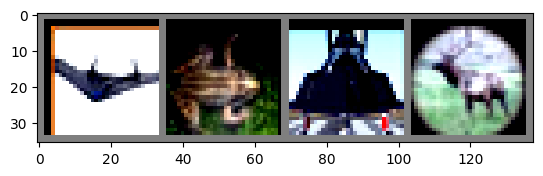

airplane  frog airplane  deer


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# select the first 4 images
images = images[:4]
labels = labels[:4]

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### Defining the Convolutional Neural Network

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout2d(0.2)
        self.conv3 = nn.Conv2d(32, 64, 3)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv4 = nn.Conv2d(64, 128, 3)
        self.conv5 = nn.Conv2d(128, 128, 3)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.dropout2 = nn.Dropout2d(0.2)
        self.fc1 = nn.Linear(128 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 16)
        self.dropout3 = nn.Dropout(0.2)
        self.fc4 = nn.Linear(16, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = self.dropout1(x)
        x = F.relu(self.conv3(x))
        x = self.pool2(x)
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.pool3(x)
        x = self.dropout2(x)
        x = x.view(-1, 128 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.fc4(x)
        return x


net = Net()
print(net)

In [5]:
# import torch.nn as nn
# import torch.nn.functional as F


# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = x.view(-1, 16 * 5 * 5)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x


# net = Net()
# print(net)


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [6]:
#TODO CHECK THE ERROR OM TORCHVIEW

### Visualizing the model


(dot.exe:6620): Pango-WARNING **: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


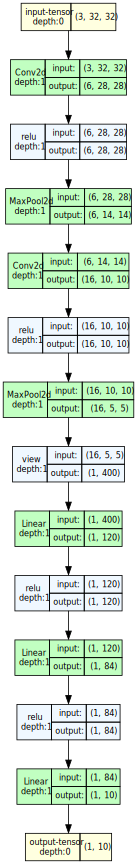

In [7]:
#https://torchview.dev/
#https://github.com/mert-kurttutan/torchview
from torchview import draw_graph
model_graph = draw_graph(net, input_size=(3,32,32), expand_nested=True)
model_graph.visual_graph

In [8]:
#https://appsilon.com/visualize-pytorch-neural-networks/
#TODO Visulaize
# from torchviz import make_dot

# model = Net()
# y = model(X)

In [9]:
# from torchviz import make_dot
# #https://stackoverflow.com/questions/52468956/how-do-i-visualize-a-net-in-pytorch

# #Backward pass apparently,
# # TODO check on this later
# batch = next(iter(dataloader_train))
# yhat = model(batch.text) # Give dummy batch to forward().

# make_dot(yhat, params=dict(list(model.named_parameters()))).render("cnn_torchviz", format="png")



In [10]:
# import hiddenlayer as hl
# #https://stackoverflow.com/questions/52468956/how-do-i-visualize-a-net-in-pytorch

# #Forward pass apparently,
# # TODO check on this later
# transforms = [ hl.transforms.Prune('Constant') ] # Removes Constant nodes from graph.

# graph = hl.build_graph(model, batch.text, transforms=transforms)
# graph.theme = hl.graph.THEMES['blue'].copy()
# graph.save('rnn_hiddenlayer', format='png')

In [11]:
# from torchview import draw_graph
# # x = torch.randn(1, 3, 32, 32)
# # y = model(x)

# model_graph = draw_graph(net(), input_size=(3,32,32), expand_nested=True)
# model_graph.visual_graph

In [12]:
# import torch
# x = torch.randn(1, 3, 32, 32)
# y = model(x)
# make_dot(y, params=dict(model.named_parameters()))

### Defining a Loss function and optimizer

In [13]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)
# torch.cuda.empty_cache()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)
# inputs = inputs.to(device)
# outputs = net(inputs)
print(device)

cuda:0


### Training the model

In [14]:
epoch_num = 200

def train_model_one_epoch(model, trainloader, optimizer, device):
    model.train()
    
    result = {'loss': [],
             'accuracy': [],
             'recall': [],
             'precision': []}
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        
        closs, accuracy, recall, precision = eval_perform(outputs, label)
        result['loss'].append(closs)
        result['accuracy'].append(accuracy)
        result['recall'].append(recall)
        result['precision'].append(precision)
        

        # loss = criterion(outputs, labels)
        closs.backward()
        optimizer.step()
        
        
    return result 

def valid_model(model, validloader, device):
    result = {'loss': [],
             'accuracy': [],
             'recall': [],
             'precision': []}
    model.eval()
    for i, data in enumerate(validloader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        
        closs, accuracy, recall, precision = eval_perform(outputs, label)
        result['loss'].append(loss)
        result['accuracy'].append(accuracy)
        result['recall'].append(recall)
        result['precision'].append(precision)
        
    return result


def train_model(model, trainloader, validloader, optimizer, num_epochs, device):
    train_perform = []
    valid_perform = []
    best_valid_perform = None
    for epoch in range(num_epochs):
        ctrain_perform = train_model_one_epoch(model, trainloader, optimizer, device)
        train_perform.append(ctrain_perform)
        cvalid_perform = valid_model(model, validloader, device)
        if cmp_perform(best_valid_perform, cvalid_perform):
            assign_perform(best_valid_perform, cvalid_perform)
            torch.save('best_valid.pt', model.state_dict())
        valid_perform.append(cvalid_perform)
        
    return train_perform, valid_perform


        
        
for epoch in range(epoch_num):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 0.115
[1,   200] loss: 0.115
[1,   300] loss: 0.115
[1,   400] loss: 0.115
[1,   500] loss: 0.115
[1,   600] loss: 0.115
[1,   700] loss: 0.114
[1,   800] loss: 0.114
[1,   900] loss: 0.112
[1,  1000] loss: 0.110
[1,  1100] loss: 0.107
[1,  1200] loss: 0.105
[1,  1300] loss: 0.103
[1,  1400] loss: 0.103
[2,   100] loss: 0.102
[2,   200] loss: 0.101
[2,   300] loss: 0.100
[2,   400] loss: 0.099
[2,   500] loss: 0.098
[2,   600] loss: 0.098
[2,   700] loss: 0.097
[2,   800] loss: 0.097
[2,   900] loss: 0.096
[2,  1000] loss: 0.095
[2,  1100] loss: 0.096
[2,  1200] loss: 0.095
[2,  1300] loss: 0.094
[2,  1400] loss: 0.093
Finished Training


### Saving our model

In [15]:
PATH = './cinic_net.pth'
torch.save(net.state_dict(), PATH)

### Testing the model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


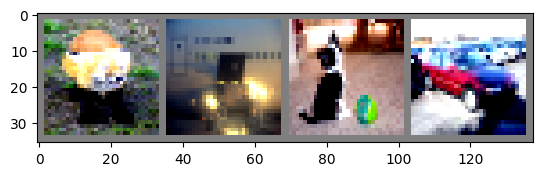

GroundTruth:    dog airplane   dog automobile


In [16]:
dataiter = iter(testloader)
images, labels = next(dataiter)
# select the first 4 images
images = images[:4]
labels = labels[:4]

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [17]:
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  truck horse horse airplane


Testing it on the whole dataset

In [18]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of the network on the 10000 test images: 31 %
Accuracy of airplane : 72 %
Accuracy of automobile : 48 %
Accuracy of  bird :  6 %
Accuracy of   cat :  9 %
Accuracy of  deer :  2 %
Accuracy of   dog : 21 %
Accuracy of  frog : 50 %
Accuracy of horse : 54 %
Accuracy of  ship : 10 %
Accuracy of truck : 36 %
